<h2>Primary Endpoint Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv')
df.select_dtypes(include=['float64', 'int64']).columns.tolist()

['TreatmentGroup',
 'StudySite',
 'Age',
 'Gender',
 'BMI',
 'DiabetesDuration',
 'SmokingStatus',
 'EducationLevel',
 'Complications',
 'BaselineHbA1c',
 'BaselineFBS',
 'BaselineWeight',
 'BaselineQoL',
 'FollowupCompleted',
 'HbA1cChange',
 'FollowupHbA1c',
 'FBSChange',
 'FollowupFBS',
 'WeightChange',
 'FollowupWeight',
 'QoLChange',
 'FollowupQoL',
 'TargetAchieved',
 'PatientSatisfaction',
 'AdverseEvents',
 'DaysToComplication',
 'ComplicationOccurred',
 'MedicationAdherence']

In [3]:
df.sample(5)

,ParticipantID,TreatmentGroup,RandomizationDate,StudySite,Age,Gender,BMI,DiabetesDuration,SmokingStatus,EducationLevel,...,WeightChange,FollowupWeight,QoLChange,FollowupQoL,TargetAchieved,PatientSatisfaction,AdverseEvents,DaysToComplication,ComplicationOccurred,MedicationAdherence
152,DM1153,1,2024-04-26,2,55,0,23.5,17,2,1,...,-3.0,108.6,2.7,90.0,0,2,1,365,0,63.3
76,DM1077,0,2024-04-27,0,45,1,34.6,18,0,0,...,-1.3,99.0,-1.0,51.0,0,0,0,365,0,92.5
87,DM1088,0,2024-06-24,2,56,0,27.9,6,0,1,...,-0.8,59.6,2.0,43.0,0,2,0,199,1,100.0
295,DM1296,1,2024-01-21,2,39,0,24.8,4,0,1,...,-7.0,65.5,17.2,71.0,1,0,0,19,1,84.0
142,DM1143,0,2024-08-15,0,30,1,33.0,11,1,1,...,-1.4,73.8,7.0,89.0,1,1,2,187,1,82.2


In [4]:
#Control group
group_A = df[df['TreatmentGroup']== 0]['BaselineHbA1c']
group_B = df[df['TreatmentGroup']== 0]['FollowupHbA1c']
#New Intervention group
group_C = df[df['TreatmentGroup']== 1]['BaselineHbA1c']
group_D = df[df['TreatmentGroup']== 1]['FollowupHbA1c']

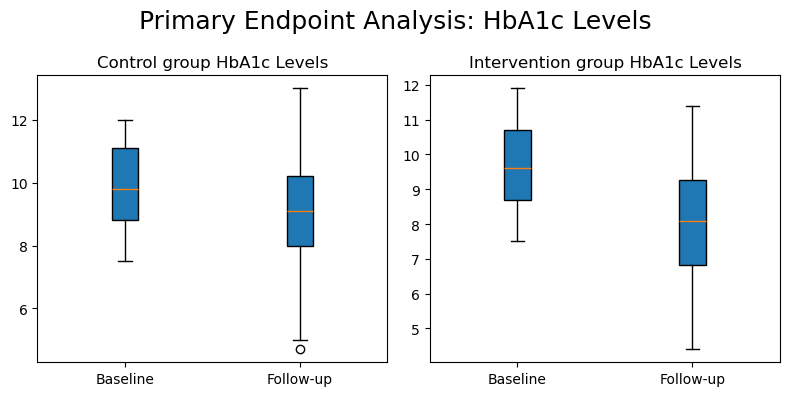

In [5]:
fig, axes = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Primary Endpoint Analysis: HbA1c Levels', fontsize = 18)
axes[0].boxplot([group_A, group_B], tick_labels=['Baseline', 'Follow-up'],patch_artist=True)
axes[0].set_title('Control group HbA1c Levels')
axes[1].boxplot([group_C, group_D], tick_labels=['Baseline', 'Follow-up'], patch_artist=True)
axes[1].set_title('Intervention group HbA1c Levels')
plt.tight_layout()
plt.show()

In [6]:
#homogenity in control and intervention groups at baseline
from scipy import stats 
t_stat_ind, p_value_ind = stats.ttest_ind(group_A, group_C)
print(f'{t_stat_ind:.2f}, {p_value_ind:.2f}')

1.38, 0.17


In [11]:
#Paired t-test to compare HbA1c change between treatment groups
t_stat_p, p_value_p = stats.ttest_ind(df[df['TreatmentGroup']==0]['HbA1cChange'], df[df['TreatmentGroup']==1]['HbA1cChange'])
print(f'{t_stat_p:.2f}, {p_value_p:.2f}')

7.67, 0.00


In [8]:
#ANCOVA to compare follow-up HbA1c levels between groups, adjusting for baseline HbA1c
import pingouin as pg
pg.ancova(data = df, dv = 'FollowupHbA1c', between = 'TreatmentGroup', covar = 'BaselineHbA1c')

,Source,SS,DF,F,p-unc,np2
0,TreatmentGroup,42.569927,1,54.313377,1.704713e-12,0.154601
1,BaselineHbA1c,589.373778,1,751.959954,2.283186e-83,0.716862
2,Residual,232.783689,297,NaN,NaN,NaN


<h2>Secondary Endpoint Analysis

In [9]:
#Secondary endpoints: FBS, Weight and QoL
sec_endpoints = ['FBS','Weight','QoL']
foll_up = ['FollowupFBS','FollowupWeight','FollowupQoL']
baseline = ['BaselineFBS','BaselineWeight','BaselineQoL']
for i,j in zip(foll_up, baseline):
    print(f'ANCOVA results for {i} adjusting for {j}:')
    print(pg.ancova(data = df, dv = i, between = 'TreatmentGroup', covar = j))
    print('\n')

ANCOVA results for FollowupFBS adjusting for BaselineFBS:
           Source             SS   DF           F         p-unc       np2
0  TreatmentGroup   56500.219090    1   79.203491  5.653178e-17  0.210534
1     BaselineFBS  465310.826714    1  652.284935  6.411451e-77  0.687133
2        Residual  211866.483686  297         NaN           NaN       NaN


ANCOVA results for FollowupWeight adjusting for BaselineWeight:
           Source            SS   DF            F          p-unc       np2
0  TreatmentGroup    386.560194    1    39.414239   1.213286e-09  0.117160
1  BaselineWeight  83003.859798    1  8463.194082  2.592263e-220  0.966097
2        Residual   2912.865535  297          NaN            NaN       NaN


ANCOVA results for FollowupQoL adjusting for BaselineQoL:
           Source            SS   DF            F          p-unc       np2
0  TreatmentGroup   1124.948277    1    22.086664   3.992660e-06  0.069218
1     BaselineQoL  87048.365988    1  1709.063495  3.205427e-125  0.85

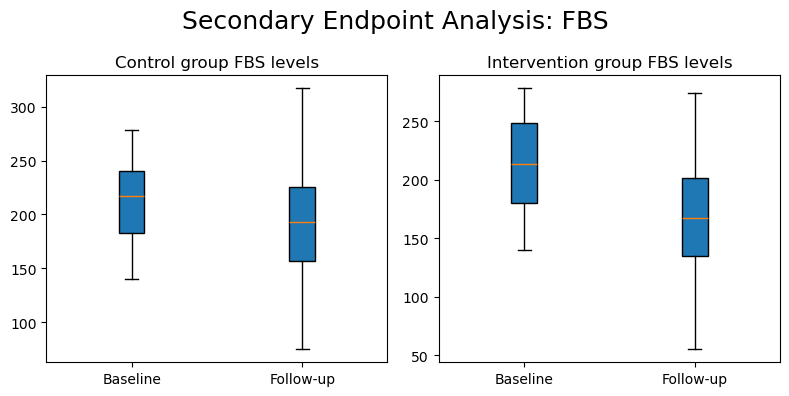

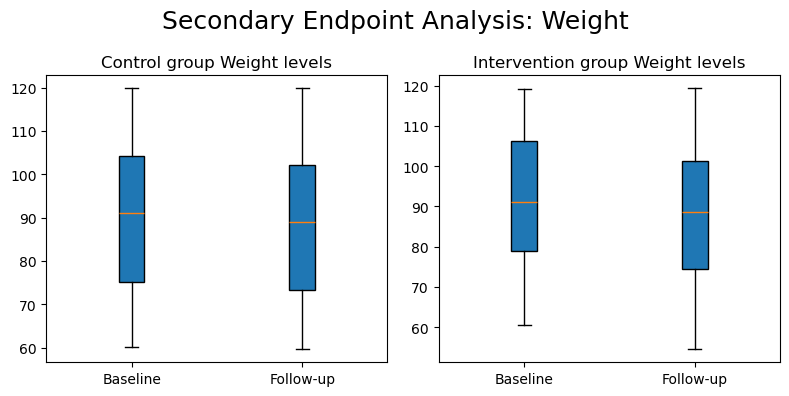

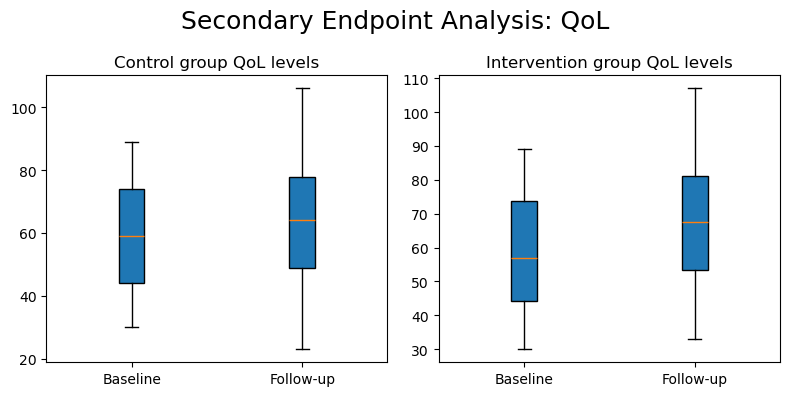

In [10]:
#Graphical comparison of Secondary Endpoints
for i,j,k in zip(sec_endpoints,foll_up, baseline):
    #control group
    gp_A = df[df['TreatmentGroup']== 0][k]
    gp_B = df[df['TreatmentGroup']== 0][j]
    #intervention group
    gp_C = df[df['TreatmentGroup']== 1][k]
    gp_D = df[df['TreatmentGroup']== 1][j]
    #boxplot creation
    fig, axes = plt.subplots(1,2, figsize = (8,4))
    fig.suptitle(f'Secondary Endpoint Analysis: {i}', fontsize = 18)
    axes[0].boxplot([gp_A, gp_B], tick_labels=['Baseline', 'Follow-up'],patch_artist=True)
    axes[0].set_title(f'Control group {i} levels')
    axes[1].boxplot([gp_C, gp_D], tick_labels=['Baseline', 'Follow-up'], patch_artist=True)
    axes[1].set_title(f'Intervention group {i} levels')
    plt.tight_layout()
    plt.show()